<a href="https://colab.research.google.com/github/FrancescoFerrelli/Motore_Allocazione/blob/main/Motore_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  13 of 13 completed
<ipython-input-8-04e8d499136f>:121: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gdp_monthly = gdp.resample('M').ffill()


Ultime righe del DataFrame macro:
            MarketCap_GDP  SP500_PE  Unemployment  Inflation  GDP_Growth
Date                                                                    
2025-04-04            NaN       NaN           NaN        NaN         NaN
2025-04-07            NaN       NaN           NaN        NaN         NaN
2025-04-08            NaN       NaN           NaN        NaN         NaN
2025-04-09            NaN       NaN           NaN        NaN         NaN
2025-04-10            NaN       NaN           NaN        NaN         NaN
Allocazione statica ottimizzata:
URTH: 0.00%
IEMG: 0.00%
AGG: 0.00%
VNQ: 0.00%
DBC: 0.00%
GLD: 5.10%
QQQ: 94.89%
VYM: 0.00%
HYG: 0.00%
TIP: 0.00%


[*********************100%***********************]  13 of 13 completed


Allocazione Statica Ottimizzata:
URTH: 0.00%
IEMG: 0.00%
AGG: 0.00%
VNQ: 0.00%
DBC: 0.00%
GLD: 5.10%
QQQ: 94.89%
VYM: 0.00%
HYG: 0.00%
TIP: 0.00%


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide

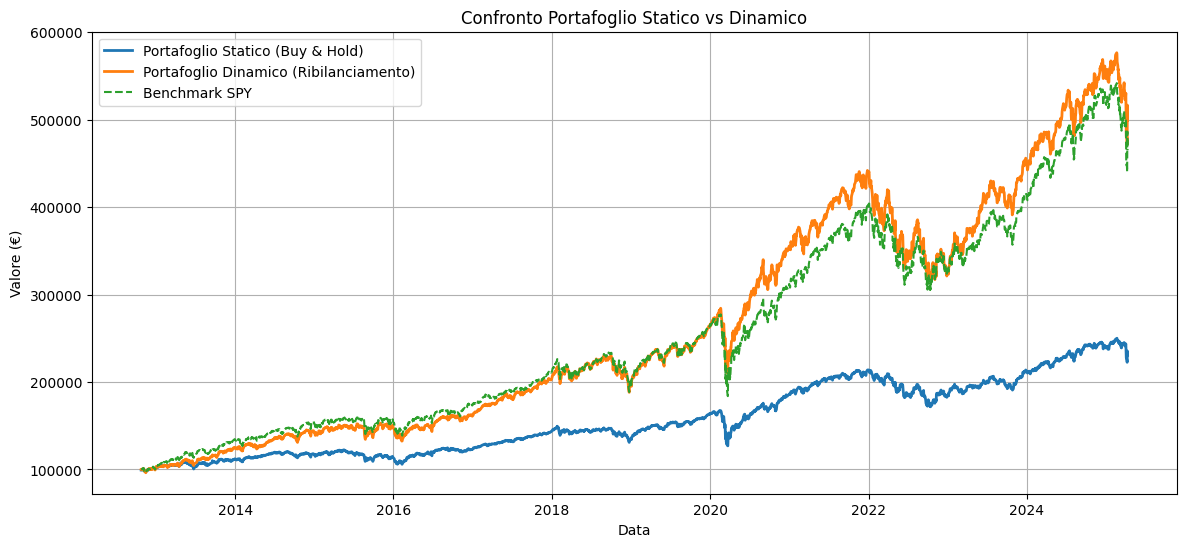

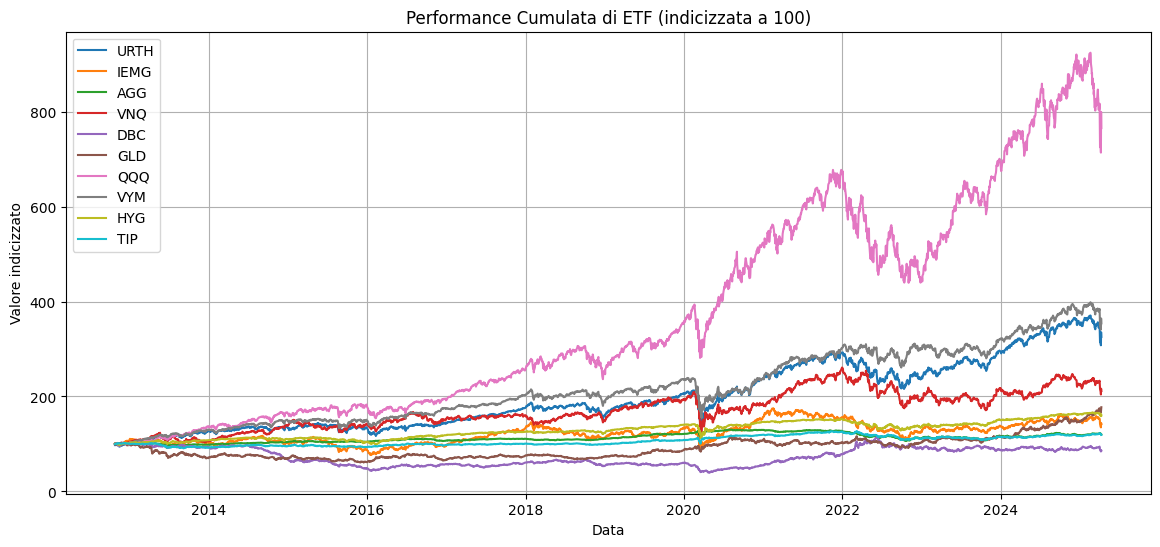


=== Performance Portafoglio Statico ===
Rendimento annualizzato: 7.44%
Volatilità annualizzata: 11.28%
Sharpe Ratio: 0.66
Max Drawdown: -24.10%
VaR (95%): -1.03%

=== Performance Portafoglio Dinamico ===
Rendimento annualizzato: 14.34%
Volatilità annualizzata: 16.65%
Sharpe Ratio: 0.86
Max Drawdown: -28.77%
VaR (95%): -1.65%


Indicatori Macro all'ultima data:
MarketCap/GDP: nan
SP500_PE: nan
Unemployment: nan
Inflation: nan%
GDP Growth: nan%
ADF p-value per URTH: 0.9268 (Stationary: False)
Hurst Exponent per URTH: 0.84


Output()


--- Documentazione degli Indici/ETF ---
URTH: iShares MSCI World ETF - ETF che replica un indice globale dei mercati sviluppati.
IEMG: iShares Core MSCI Emerging Markets ETF - ETF focalizzato sui mercati emergenti.
AGG: iShares Core U.S. Aggregate Bond ETF - ETF che replica la performance del mercato obbligazionario statunitense.
VNQ: Vanguard Real Estate ETF - ETF focalizzato sul mercato immobiliare statunitense.
DBC: Invesco DB Commodity Index Tracking Fund - ETF che segue il mercato delle commodity.
GLD: SPDR Gold Shares - ETF che replica l’andamento del prezzo dell’oro.
QQQ: Invesco QQQ Trust - ETF che segue le performance delle principali società tecnologiche statunitensi.
VYM: Vanguard High Dividend Yield ETF - ETF focalizzato su società ad alto dividendo.
HYG: iShares iBoxx $ High Yield Corporate Bond ETF - ETF che replica l’andamento delle obbligazioni ad alto rendimento.
TIP: iShares TIPS Bond ETF - ETF focalizzato su obbligazioni indicizzate all’inflazione.


In [ ]:
# 📦 Installa le librerie necessarie (solo su Colab)
!pip install yfinance matplotlib pandas cvxpy ipywidgets fredapi statsmodels

# 📚 Import delle librerie
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from datetime import datetime
from ipywidgets import interact, FloatSlider, VBox, HBox, Output, Tab
import ipywidgets as widgets
from statsmodels.tsa.stattools import adfuller
from fredapi import Fred

# ----------------------------------------------
# 1. Informazioni sugli ETF/Indici
indices_info = {
    "URTH": {
        "nome": "iShares MSCI World ETF",
        "descrizione": "ETF che replica un indice globale dei mercati sviluppati."
    },
    "IEMG": {
        "nome": "iShares Core MSCI Emerging Markets ETF",
        "descrizione": "ETF focalizzato sui mercati emergenti."
    },
    "AGG": {
        "nome": "iShares Core U.S. Aggregate Bond ETF",
        "descrizione": "ETF che replica la performance del mercato obbligazionario statunitense."
    },
    "VNQ": {
        "nome": "Vanguard Real Estate ETF",
        "descrizione": "ETF focalizzato sul mercato immobiliare statunitense."
    },
    "DBC": {
        "nome": "Invesco DB Commodity Index Tracking Fund",
        "descrizione": "ETF che segue il mercato delle commodity."
    },
    "GLD": {
        "nome": "SPDR Gold Shares",
        "descrizione": "ETF che replica l’andamento del prezzo dell’oro."
    },
    "QQQ": {
        "nome": "Invesco QQQ Trust",
        "descrizione": "ETF che segue le performance delle principali società tecnologiche statunitensi."
    },
    "VYM": {
        "nome": "Vanguard High Dividend Yield ETF",
        "descrizione": "ETF focalizzato su società ad alto dividendo."
    },
    "HYG": {
        "nome": "iShares iBoxx $ High Yield Corporate Bond ETF",
        "descrizione": "ETF che replica l’andamento delle obbligazioni ad alto rendimento."
    },
    "TIP": {
        "nome": "iShares TIPS Bond ETF",
        "descrizione": "ETF focalizzato su obbligazioni indicizzate all’inflazione."
    }
}

# Definizione del portafoglio iniziale (target statico)
portfolio_target_initial = {
    "URTH": 0.35,
    "IEMG": 0.10,
    "AGG": 0.15,
    "VNQ": 0.05,
    "DBC": 0.05,
    "GLD": 0.05,
    "QQQ": 0.07,
    "VYM": 0.05,
    "HYG": 0.04,
    "TIP": 0.04
}

# Benchmark per confronto
benchmarks = ["SPY", "ACWI", "AOR"]
all_tickers = list(portfolio_target_initial.keys()) + benchmarks

# ----------------------------------------------
# 2. Download dati storici
start_date = "2000-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
data = yf.download(all_tickers, start=start_date, end=end_date)
if 'Adj Close' in data:
    data = data["Adj Close"]
else:
    data = data["Close"]
data.dropna(inplace=True)
returns = data.pct_change().dropna()

# ----------------------------------------------
# 3. Scarica dati macroeconomici da FRED
def load_macro_data_fred(api_key):
    """
    Scarica e organizza i dati macro da FRED necessari per il ribilanciamento:
      - GDP (serie "GDP" trimestrale, resampled a monthly)
      - Market Cap: "SP500MC" (capitalizzazione di mercato S&P 500)
      - Aggregated P/E: "SP500_PE"
      - Disoccupazione: "UNRATE"
      - CPI: "CPIAUCSL" (per calcolare inflazione)
    Calcola inoltre:
      - MarketCap/GDP ratio
      - Inflazione year-over-year (%)
      - GDP Growth Rate year-over-year (%)
    """
    fred = Fred(api_key=api_key)
    gdp = fred.get_series("GDP")  # GDP trimestrale
    # Use a try-except block to handle potential errors when fetching data
    try:
        sp500_mc = fred.get_series("SP500MC")  # Capitalizzazione di mercato S&P 500
    except:
        sp500_mc = None  # Set to None if data is not available
    try:
        sp500_pe = fred.get_series("SP500_PE")   # Aggregated P/E S&P 500
    except:
        sp500_pe = None  # Set to None if data is not available
    unrate = fred.get_series("UNRATE")          # Tasso di disoccupazione
    cpi = fred.get_series("CPIAUCSL")             # CPI

    # Resample GDP a mensile
    gdp_monthly = gdp.resample('M').ffill()
    # Handle cases where sp500_mc is None
    if sp500_mc is not None:
        sp500_mc = sp500_mc.resample('M').ffill()
        market_cap_gdp = sp500_mc / gdp_monthly
    else:
        market_cap_gdp = pd.Series(np.nan, index=gdp_monthly.index)  # Create a series of NaN values

    # Handle cases where sp500_pe is None
    if sp500_pe is not None:
        sp500_pe = sp500_pe.resample('M').ffill()
    else:
        sp500_pe = pd.Series(np.nan, index=gdp_monthly.index) # Create a series of NaN values

    inflation = cpi.pct_change(12) * 100
    gdp_growth = gdp_monthly.pct_change(12) * 100
    macro_df = pd.DataFrame({
        "MarketCap_GDP": market_cap_gdp,
        "SP500_PE": sp500_pe,
        "Unemployment": unrate,
        "Inflation": inflation,
        "GDP_Growth": gdp_growth
    })
    macro_df.dropna(inplace=True)
    # Ensure the macro_df has the same index as the returns DataFrame
    macro_df = macro_df.reindex(returns.index, method='ffill')
    return macro_df

# Inserisci la tua API key FRED qui
api_key = "4bc240d30483445938e22f4ad7344524"
macro_data = load_macro_data_fred(api_key)
print("Ultime righe del DataFrame macro:")
print(macro_data.tail())

# ----------------------------------------------
# 4. Funzioni di metriche e indicatori economici/statistici
def compute_max_drawdown(series):
    rolling_max = series.cummax()
    drawdown = (series - rolling_max) / rolling_max
    return drawdown.min()

def compute_VaR(series, confidence=0.95):
    daily_ret = series.pct_change().dropna()
    var = np.percentile(daily_ret, (1 - confidence) * 100)
    return var

def hurst_exponent(ts):
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0]*2.0

def adf_test(series):
    result = adfuller(series)
    return result[1]  # restituisce il p-value

def check_series_properties(manager, current_date):
    """
    Calcola l'esponente di Hurst e il p-value del test ADF per la serie equity (proxy URTH).
    Restituisce: is_stationary (True se ADF p-value < 0.05), Hurst, p-value.
    """
    try:
        serie = manager.data["URTH"].loc[:current_date].dropna()
        H = hurst_exponent(serie.values)
        adf_p = adf_test(serie)
        return adf_p < 0.05, H, adf_p
    except Exception as e:
        return True, np.nan, np.nan

# ----------------------------------------------
# 5. Ottimizzazione Statico con Max Rendimento sotto Vincolo di Rischio
def optimize_portfolio(returns, sigma_target=0.2, risk_free_rate=0.0):
    tickers = list(portfolio_target_initial.keys())
    # Ensure returns has the expected tickers and is not empty
    R = returns[tickers].dropna()  # Select columns and drop any rows with NaN
    if R.empty:
        raise ValueError("Returns DataFrame is empty or does not contain the expected tickers.")

    # Check if R has enough data for covariance calculation
    if R.shape[0] < 2:  # Need at least 2 rows to calculate covariance
        raise ValueError("Not enough data in the returns DataFrame to calculate covariance.")

    mu = R.mean() * 252  # Rendimento annuale atteso
    sigma = R.cov() * 252
    n = len(tickers)
    w = cp.Variable(n)

    # Reshape mu to be a column vector
    mu = mu.values.reshape(-1, 1)

    objective = cp.Maximize(mu.T @ w) # Transpose mu for correct dot product
    constraints = [cp.sum(w) == 1,
                   cp.quad_form(w, sigma) <= sigma_target**2,
                   w >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.SCS)
    weights = w.value
    opt_alloc = {ticker: weight for ticker, weight in zip(tickers, weights)}
    return opt_alloc

opt_alloc = optimize_portfolio(returns, sigma_target=0.2)
print("Allocazione statica ottimizzata:")
for t, w in opt_alloc.items():
    print(f"{t}: {w:.2%}")

# ----------------------------------------------
# 6. Classe PortfolioManager con Statico, Dinamico e Backtest
class PortfolioManager:
    def __init__(self, portfolio_target, benchmarks, start_date, end_date=None, initial_value=100000):
        self.portfolio_target = portfolio_target.copy()      # target statico
        self.portfolio_dynamic = portfolio_target.copy()       # allocazione dinamica attuale
        self.benchmarks = benchmarks
        self.all_tickers = list(portfolio_target.keys()) + benchmarks
        self.start_date = start_date
        self.end_date = end_date or datetime.today().strftime("%Y-%m-%d")
        self.initial_value = initial_value
        self.data = None
        self.returns = None
        self.cum_static = None
        self.cum_dynamic = None
        self.rebalance_log = pd.DataFrame()  # log delle decisioni

    def download_data(self):
        data = yf.download(self.all_tickers, start=self.start_date, end=self.end_date)
        if 'Adj Close' in data:
            data = data["Adj Close"]
        else:
            data = data["Close"]
        data.dropna(inplace=True)
        self.data = data

    def compute_returns(self):
        self.returns = self.data.pct_change().dropna()

    def compute_cumulative(self, allocations, initial_value=None):
        if initial_value is None:
            initial_value = self.initial_value
        weighted_returns = self.returns[list(allocations.keys())].mul(allocations, axis=1)
        port_returns = weighted_returns.sum(axis=1)
        cum = (1 + port_returns).cumprod() * initial_value
        return cum

    def static_backtest(self):
        self.cum_static = self.compute_cumulative(self.portfolio_target)

    def dynamic_backtest(self, rebalance_func, rebalance_freq=1):
        dates = self.returns.index
        dynamic_values = [self.initial_value]
        current_allocations = self.portfolio_dynamic.copy()
        logs = []
        for i, date in enumerate(dates):
            if i % rebalance_freq == 0:
                new_alloc = rebalance_func(self, date, current_allocations)
                macro_ind = get_macro_indicators_from_fred(self, date, macro_data)
                is_stationary, H_val, adf_p = check_series_properties(self, date)
                logs.append({
                    "Date": date,
                    "MarketCap_GDP": macro_ind.get("MarketCap_GDP", np.nan),
                    "SP500_PE": macro_ind.get("SP500_PE", np.nan),
                    "Unemployment": macro_ind.get("Unemployment", np.nan),
                    "Inflation": macro_ind.get("Inflation", np.nan),
                    "GDP_Growth": macro_ind.get("GDP_Growth", np.nan),
                    "Hurst": H_val,
                    "ADF_p": adf_p,
                    "Allocations": new_alloc
                })
                current_allocations = new_alloc
            daily_ret = self.returns.loc[date, list(current_allocations.keys())]
            port_return = sum(daily_ret[t] * current_allocations[t] for t in current_allocations)
            new_value = dynamic_values[-1] * (1 + port_return)
            dynamic_values.append(new_value)
        self.cum_dynamic = pd.Series(dynamic_values[1:], index=dates)
        self.rebalance_log = pd.DataFrame(logs)

    def plot_results(self):
        plt.figure(figsize=(14,6))
        plt.plot(self.cum_static, label="Portafoglio Statico (Buy & Hold)", linewidth=2)
        plt.plot(self.cum_dynamic, label="Portafoglio Dinamico (Ribilanciamento)", linewidth=2)
        if "SPY" in self.data.columns:
            bench = (1 + self.returns["SPY"]).cumprod() * self.initial_value
            plt.plot(bench, label="Benchmark SPY", linestyle="--")
        plt.title("Confronto Portafoglio Statico vs Dinamico")
        plt.xlabel("Data")
        plt.ylabel("Valore (€)")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_asset_series(self):
        tickers = list(self.portfolio_target.keys())
        plt.figure(figsize=(14,6))
        for ticker in tickers:
            serie = (1 + self.returns[ticker]).cumprod()*100
            plt.plot(serie, label=ticker)
        plt.title("Performance Cumulata di ETF (indicizzata a 100)")
        plt.xlabel("Data")
        plt.ylabel("Valore indicizzato")
        plt.legend()
        plt.grid(True)
        plt.show()

    def compute_performance_metrics(self, series):
        daily_ret = series.pct_change().dropna()
        ann_return = daily_ret.mean() * 252
        ann_vol = daily_ret.std() * np.sqrt(252)
        sharpe = ann_return / ann_vol if ann_vol != 0 else np.nan
        mdd = compute_max_drawdown(series)
        var = compute_VaR(series)
        return ann_return, ann_vol, sharpe, mdd, var

# ----------------------------------------------
# 7. Integrazione dei dati macro reali nel modello
def get_macro_indicators_from_fred(manager, current_date, macro_df):
    """
    Per la data corrente, restituisce i KPI macro ottenuti da FRED.
    Se non sono disponibili per la data corrente, prende la riga più vicina (passata).
    """
    try:
        row = macro_df.loc[:current_date].iloc[-1]
    except Exception as e:
        return {"MarketCap_GDP": np.nan, "SP500_PE": np.nan, "Unemployment": np.nan,
                "Inflation": np.nan, "GDP_Growth": np.nan}
    return {
        "MarketCap_GDP": row["MarketCap_GDP"],
        "SP500_PE": row["SP500_PE"],
        "Unemployment": row["Unemployment"],
        "Inflation": row["Inflation"],
        "GDP_Growth": row["GDP_Growth"]
    }

# ----------------------------------------------
# 8. Funzione di ribilanciamento dinamico con dati macro reali, test ADF e diversificazione minima (min_alloc = 5%)
def dynamic_rebalance(manager, current_date, current_allocations,
                      equity_multiplier=0.8, fixed_income_multiplier=0.8,
                      aggressive_equity_multiplier=1.2, min_alloc=0.05):
    """
    Logica di ribilanciamento dinamico:
      - Recupera i KPI macro reali da FRED.
      - Esegue il test ADF e calcola l'esponente di Hurst per URTH.
      - Se il MarketCap/GDP > 1.5 o il SP500_PE > 25 e il test ADF indica non-stazionarietà (p-value > 0.05),
        aumenta l'esposizione equity usando aggressive_equity_multiplier;
      - Altrimenti, applica equity_multiplier;
      - Per il fixed income, utilizza il segnale da proxy su AGG.
      - Applica un floor di allocazione pari al 5% a ciascun asset, poi normalizza.
    """
    new_alloc = current_allocations.copy()
    macro_ind = get_macro_indicators_from_fred(manager, current_date, macro_data)
    is_stationary, H_val, adf_p = check_series_properties(manager, current_date)

    bubble_condition = False
    if not np.isnan(macro_ind["MarketCap_GDP"]) and macro_ind["MarketCap_GDP"] > 1.5:
        bubble_condition = True
    if not np.isnan(macro_ind["SP500_PE"]) and macro_ind["SP500_PE"] > 25:
        bubble_condition = True

    if bubble_condition:
        if adf_p > 0.05:
            for ticker in ["URTH", "IEMG", "QQQ", "VYM"]:
                new_alloc[ticker] = manager.portfolio_target[ticker] * aggressive_equity_multiplier
        else:
            for ticker in ["URTH", "IEMG", "QQQ", "VYM"]:
                new_alloc[ticker] = manager.portfolio_target[ticker] * equity_multiplier
    else:
        for ticker in ["URTH", "IEMG", "QQQ", "VYM"]:
            new_alloc[ticker] = manager.portfolio_target[ticker]

    try:
        agg_series = manager.data["AGG"].loc[:current_date]
        agg_price = agg_series.iloc[-1]
        agg_50SMA = agg_series.rolling(window=50).mean().iloc[-1]
        if agg_price < 0.95 * agg_50SMA:
            new_alloc["AGG"] = manager.portfolio_target["AGG"] * fixed_income_multiplier
        elif agg_price > 1.05 * agg_50SMA:
            new_alloc["AGG"] = manager.portfolio_target["AGG"] * (1 / fixed_income_multiplier)
        else:
            new_alloc["AGG"] = manager.portfolio_target["AGG"]
    except:
        new_alloc["AGG"] = manager.portfolio_target["AGG"]

    for ticker in ["VNQ", "DBC", "GLD", "HYG", "TIP"]:
        new_alloc[ticker] = manager.portfolio_target[ticker]

    # Applica il floor di allocazione (min_alloc = 5%) a ciascun asset
    for t in new_alloc:
        new_alloc[t] = max(new_alloc[t], min_alloc)
    total = sum(new_alloc.values())
    for t in new_alloc:
        new_alloc[t] = new_alloc[t] / total

    return new_alloc

# ----------------------------------------------
# 9. Creazione della Dashboard Interattiva
manager = PortfolioManager(portfolio_target=portfolio_target_initial, benchmarks=benchmarks, start_date=start_date)
manager.download_data()
manager.compute_returns()
manager.static_backtest()

def update_dashboard(equity_mult, fixed_income_mult, risk_target, agg_eq_mult):
    static_opt = optimize_portfolio(returns, sigma_target=risk_target)
    print("Allocazione Statica Ottimizzata:")
    for t, w in static_opt.items():
        print(f"{t}: {w:.2%}")
    manager.portfolio_target = static_opt

    manager.dynamic_backtest(
        rebalance_func=lambda m, d, alloc: dynamic_rebalance(m, d, alloc,
                                                              equity_multiplier=equity_mult,
                                                              fixed_income_multiplier=fixed_income_mult,
                                                              aggressive_equity_multiplier=agg_eq_mult,
                                                              min_alloc=0.05),
        rebalance_freq=1
    )
    manager.plot_results()
    manager.plot_asset_series()
    static_metrics = manager.compute_performance_metrics(manager.cum_static)
    dynamic_metrics = manager.compute_performance_metrics(manager.cum_dynamic)
    print("\n=== Performance Portafoglio Statico ===")
    print(f"Rendimento annualizzato: {static_metrics[0]:.2%}")
    print(f"Volatilità annualizzata: {static_metrics[1]:.2%}")
    print(f"Sharpe Ratio: {static_metrics[2]:.2f}")
    print(f"Max Drawdown: {static_metrics[3]:.2%}")
    print(f"VaR (95%): {static_metrics[4]:.2%}\n")
    print("=== Performance Portafoglio Dinamico ===")
    print(f"Rendimento annualizzato: {dynamic_metrics[0]:.2%}")
    print(f"Volatilità annualizzata: {dynamic_metrics[1]:.2%}")
    print(f"Sharpe Ratio: {dynamic_metrics[2]:.2f}")
    print(f"Max Drawdown: {dynamic_metrics[3]:.2%}")
    print(f"VaR (95%): {dynamic_metrics[4]:.2%}\n")

    indicators = get_macro_indicators_from_fred(manager, manager.returns.index[-1], macro_data)
    is_stationary, H_val, adf_p = check_series_properties(manager, manager.returns.index[-1])
    print("\nIndicatori Macro all'ultima data:")
    print(f"MarketCap/GDP: {indicators.get('MarketCap_GDP', np.nan):.2f}")
    print(f"SP500_PE: {indicators.get('SP500_PE', np.nan):.2f}")
    print(f"Unemployment: {indicators.get('Unemployment', np.nan):.2f}")
    print(f"Inflation: {indicators.get('Inflation', np.nan):.2f}%")
    print(f"GDP Growth: {indicators.get('GDP_Growth', np.nan):.2f}%")
    print(f"ADF p-value per URTH: {adf_p:.4f} (Stationary: {is_stationary})")
    print(f"Hurst Exponent per URTH: {H_val:.2f}")

equity_slider = FloatSlider(value=0.8, min=0.5, max=1.0, step=0.05, description="Equity mult.")
fixed_income_slider = FloatSlider(value=0.8, min=0.5, max=1.0, step=0.05, description="Fixed Inc. mult.")
risk_slider = FloatSlider(value=0.2, min=0.1, max=0.4, step=0.05, description="Sigma target")
agg_eq_slider = FloatSlider(value=1.2, min=1.0, max=1.5, step=0.05, description="Aggressive eq.")

dashboard_controls = VBox([HBox([equity_slider, fixed_income_slider]),
                             HBox([risk_slider, agg_eq_slider])])
out = Output()

def dashboard_update(change):
    with out:
        out.clear_output()
        update_dashboard(equity_slider.value, fixed_income_slider.value, risk_slider.value, agg_eq_slider.value)

equity_slider.observe(dashboard_update, names='value')
fixed_income_slider.observe(dashboard_update, names='value')
risk_slider.observe(dashboard_update, names='value')
agg_eq_slider.observe(dashboard_update, names='value')

update_dashboard(equity_slider.value, fixed_income_slider.value, risk_slider.value, agg_eq_slider.value)
display(dashboard_controls, out)

# ----------------------------------------------
# 10. Documentazione degli Indici/ETF
print("\n--- Documentazione degli Indici/ETF ---")
for ticker, info in indices_info.items():
    print(f"{ticker}: {info['nome']} - {info['descrizione']}")


In [ ]:
# Assuming 'manager' is the PortfolioManager object after running backtests
final_allocations = manager.rebalance_log.iloc[-1]['Allocations']

print("Final Dynamic Portfolio Composition:")
for ticker, weight in final_allocations.items():
    print(f"{ticker}: {weight:.2%}")

Final Dynamic Portfolio Composition:
URTH: 3.57%
IEMG: 3.57%
AGG: 3.57%
VNQ: 3.57%
DBC: 3.57%
GLD: 3.65%
QQQ: 67.78%
VYM: 3.57%
HYG: 3.57%
TIP: 3.57%
